# Demo. Sentinel-2 image matching. LoFTR. Detector-Free Local Feature Matching with Transformers

In this notebook we're gonna load the pretrained LoFTT model and use it to match two images.

<div style="text-align: center;">
  <img src="https://images.unsplash.com/photo-1446776811953-b23d57bd21aa?ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&q=80&w=1172" width="600" />
</div>

## Importing libraries

In [55]:
import cv2
from pathlib import Path
import os
from glob import glob
import matplotlib.pyplot as plt
from model_inference import make_prediction, read_raster_image, plot_images, draw_matches

## Preparing images

In [56]:
dataset_path = Path("./dataset")

In [57]:
confidence = 0.8

In [58]:
image_size = (1098, 1098)

In [59]:
image_indexes = (15, 5) # images with indexes 5 and 15

In [60]:
pretrained_model = "outdoor"

In [61]:
filenames = []
for filename in glob(os.path.join(dataset_path, "*.jp2")):
    filenames.append(filename)

In [62]:
images = []
for i in image_indexes:
    image, meta = read_raster_image(filenames[i])
    images.append(image)
    print(f"Image {i} was created, shape: {image.shape}")

Image 15 was created, shape: (10980, 10980, 3)
Image 5 was created, shape: (10980, 10980, 3)


Decreased images for plotting

In [63]:
dscale_images = [cv2.resize(image, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_AREA) for image in images]

## Plottting images

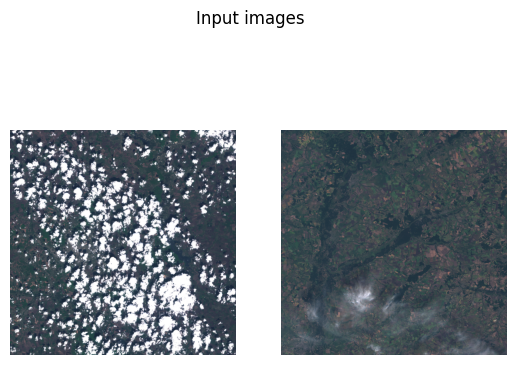

In [64]:
plot_images(dscale_images[0], dscale_images[1])

## Make prediction

In [65]:
keypoints1, keypoints2, inliers, image1, image2 = make_prediction(
        images[0], images[1], image_size, confidence, pretrained_model)

## Print results

In [66]:
num_keypoints = len(inliers)
num_inliers = sum(inliers)[0]
ratio = num_inliers / float(num_keypoints)

print(
    f"Number of keypoints: {num_keypoints}, number of inliers: {num_inliers}, ratio: {ratio}"
)

Number of keypoints: 129, number of inliers: 81, ratio: 0.627906976744186


## Visualize Results and save figure locally

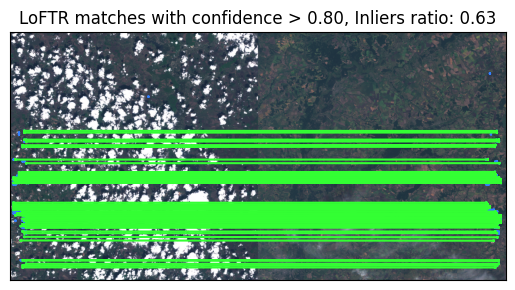

In [67]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set(xticks=[], yticks=[])
ax.set_title(f"LoFTR matches with confidence > {confidence:.2f}, Inliers ratio: {ratio:.2f}")
output_figure = draw_matches(ax, image1, image2, keypoints1, keypoints2, inliers)

plt.savefig("result.png")
plt.show()

## Second example

In [68]:
image_indexes = (35, 25) # images with indexes 5 and 15

In [69]:
images = []
for i in image_indexes:
    image, meta = read_raster_image(filenames[i])
    images.append(image)
    print(f"Image {i} was created, shape: {image.shape}")

Image 35 was created, shape: (10980, 10980, 3)
Image 25 was created, shape: (10980, 10980, 3)


In [70]:
dscale_images = [cv2.resize(image, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_AREA) for image in images]

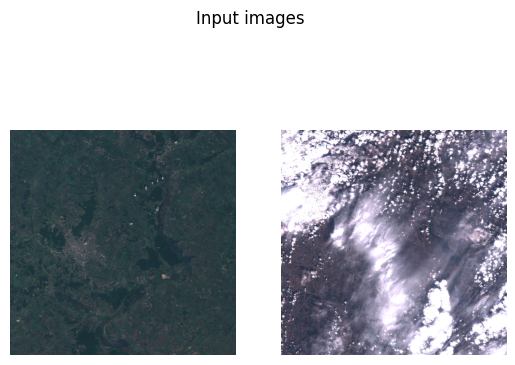

In [71]:
plot_images(dscale_images[0], dscale_images[1])

In [72]:
keypoints1, keypoints2, inliers, image1, image2 = make_prediction(
        images[0], images[1], image_size, confidence, pretrained_model)

In [73]:
num_keypoints = len(inliers)
num_inliers = sum(inliers)[0]
ratio = num_inliers / float(num_keypoints)

print(
    f"Number of keypoints: {num_keypoints}, number of inliers: {num_inliers}, ratio: {ratio}"
)

Number of keypoints: 347, number of inliers: 206, ratio: 0.5936599423631124


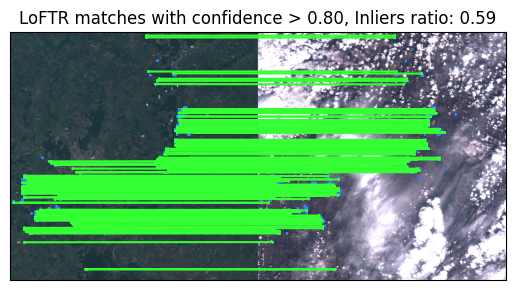

In [74]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set(xticks=[], yticks=[])
ax.set_title(f"LoFTR matches with confidence > {confidence:.2f}, Inliers ratio: {ratio:.2f}")
output_figure = draw_matches(ax, image1, image2, keypoints1, keypoints2, inliers)

plt.savefig("result.png")
plt.show()